<a href="https://colab.research.google.com/github/dyounes/Loan_Status_Prediction_ML_V1/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Problems**

The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

**Dataset Link:**

https://www.kaggle.com/datasets/ninzaami/loan-predication?select=train_u6lujuX_CVtuZ9i+%281%29.csv

**This notebook aims to:**

Analyze customer data provided in data 
set (EDA)
Build various ML models that can predict loan approval

The machine learning models used in this project are:
**bold text**
Logistic Regression
K-Nearest Neighbour (KNN)
Support Vector Machine (SVM)
Naive Bayes
Decision Tree
Random Forest
Gradient Boost

**Data Set Description:**

There are 13 variables in this data set:

**8** categorical variables,
**4** continuous variables, and
**1** variable to accommodate the loan ID.

In [ ]:
#  Import the dependencies 
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mso
import warnings
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

warnings.filterwarnings('ignore')


**Data Collection and Processing**

In [ ]:
#  loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [ ]:
# printing first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# checking the number of rows and columns of the dataframe
loan_dataset.shape

(614, 13)

**Data Exploration**

This section will perform data exploration of "row" data set that has been imported.

**Categorical Variables**

1. Loan_ID

In [ ]:
loan_dataset.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

we can observe that there are 614 unique ID in the dataset.

2. Gender

In [ ]:
loan_dataset.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

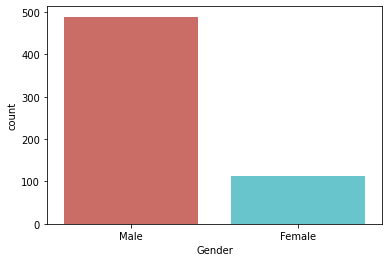

In [ ]:
sns.countplot(x='Gender', data=loan_dataset, palette='hls')
plt.show()

In [ ]:
count_Male = len(loan_dataset[loan_dataset.Gender== 'Male'])
count_Female = len(loan_dataset[loan_dataset.Gender== 'Female'])
count_Null = len(loan_dataset[loan_dataset.Gender.isnull()])
#   printing the observation 
print(f"Percentage of Male applicant for loans : {(count_Male / (len(loan_dataset.Gender))*100 ):.2f}%")
print(f"Percentage of Female applicant for loans : {(count_Female / (len(loan_dataset.Gender))*100 ):.2f}%")
print(f"Percentage of Missing values : {(count_Null / (len(loan_dataset.Gender))*100 ):.2f}%")

Percentage of Male applicant for loans : 79.64%
Percentage of Female applicant for loans : 18.24%
Percentage of Missing values : 2.12%


We observe from the results above, the number of male applicants is higher compared to female applicants.

It also can be seen there are missing values in this column.

3. Married

In [ ]:
loan_dataset.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

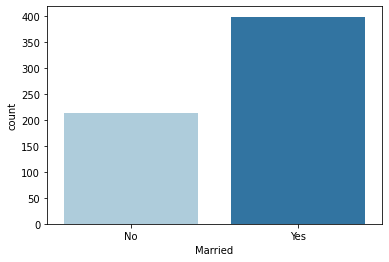

In [ ]:
sns.countplot(x='Married', data=loan_dataset, palette='Paired')
plt.show()

In [ ]:
count_Yes = len(loan_dataset[loan_dataset.Married== 'Yes'])
count_No = len(loan_dataset[loan_dataset.Married== 'No'])
count_Null = len(loan_dataset[loan_dataset.Married.isnull()])
#   printing the observation 
print(f"Percentage of Married applicant for loans : {(count_Yes / (len(loan_dataset.Married))*100 ):.2f}%")
print(f"Percentage of not Married applicant for loans : {(count_No / (len(loan_dataset.Married))*100 ):.2f}%")
print(f"Percentage of Missing values : {(count_Null / (len(loan_dataset.Married))*100 ):.2f}%")

Percentage of Married applicant for loans : 64.82%
Percentage of not Married applicant for loans : 34.69%
Percentage of Missing values : 0.49%


Applicants that has been married is higher compared to applicants that hasn't married.

There are small number of missing values in this column.

4. Education

In [ ]:
loan_dataset.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

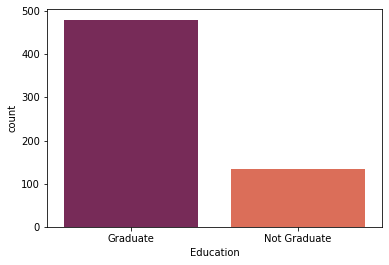

In [ ]:
sns.countplot(x="Education", data=loan_dataset, palette="rocket")
plt.show()

In [ ]:
count_Graduate = len(loan_dataset[loan_dataset.Education== 'Graduate'])
count_NotGraduate = len(loan_dataset[loan_dataset.Education== 'Not Graduate'])
count_Null = len(loan_dataset[loan_dataset.Education.isnull()])
#   printing the observation 
print(f"Percentage of Graduate applicant for loans : {(count_Graduate / (len(loan_dataset.Education))*100 ):.2f}%")
print(f"Percentage of Not Graduate applicant for loans : {(count_NotGraduate / (len(loan_dataset.Education))*100 ):.2f}%")
print(f"Percentage of Missing values : {(count_Null / (len(loan_dataset.Education))*100 ):.2f}%")

Percentage of Graduate applicant for loans : 78.18%
Percentage of Not Graduate applicant for loans : 21.82%
Percentage of Missing values : 0.00%


Applicants that has been graduated is higher compared to applicants that hasn't graduated.

5.Self Employed

In [ ]:
loan_dataset.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

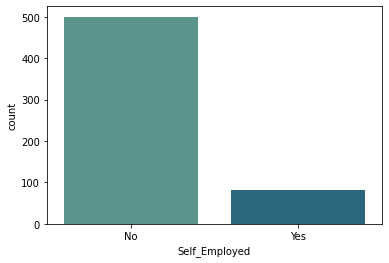

In [ ]:
sns.countplot(x="Self_Employed", data=loan_dataset, palette='crest')

In [ ]:
count_Employed = len(loan_dataset[loan_dataset.Self_Employed== 'Yes'])
count_NotEmployed = len(loan_dataset[loan_dataset.Self_Employed== 'No'])
count_Null = len(loan_dataset[loan_dataset.Self_Employed.isnull()])
#   printing the observation 
print(f"Percentage of Self Employed applicant for loans : {(count_Employed / (len(loan_dataset.Self_Employed))*100 ):.2f}%")
print(f"Percentage of Not Sel Employed applicant for loans : {(count_NotEmployed / (len(loan_dataset.Self_Employed))*100 ):.2f}%")
print(f"Percentage of Missing values : {(count_Null / (len(loan_dataset.Self_Employed))*100 ):.2f}%")

Percentage of Self Employed applicant for loans : 13.36%
Percentage of Not Sel Employed applicant for loans : 81.43%
Percentage of Missing values : 5.21%


applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column

6. Credit History

In [ ]:
loan_dataset.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

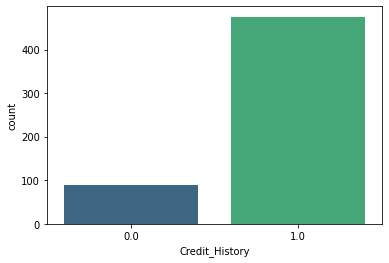

In [ ]:
sns.countplot(x="Credit_History", data=loan_dataset, palette="viridis")
plt.show()

In [ ]:
count_1 = len(loan_dataset[loan_dataset.Credit_History== 1])
count_0 = len(loan_dataset[loan_dataset.Credit_History== 0])
count_Null = len(loan_dataset[loan_dataset.Credit_History.isnull()])
#   printing the observation 
print(f"Percentage of Good Credit History for loans : {(count_1 / (len(loan_dataset.Credit_History))*100 ):.2f}%")
print(f"Percentage of bad Credit Historyt for loans : {(count_0 / (len(loan_dataset.Credit_History))*100 ):.2f}%")
print(f"Percentage of Missing values : {(count_Null / (len(loan_dataset.Credit_History))*100 ):.2f}%")

Percentage of Good Credit History for loans : 77.36%
Percentage of bad Credit Historyt for loans : 14.50%
Percentage of Missing values : 8.14%


applicants that have good credit history is higher compared to applicants that have bad credit history. 

There are missing values in this column.

7. Property Area

In [ ]:
loan_dataset.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

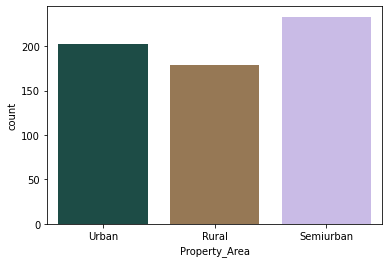

In [ ]:
sns.countplot(x="Property_Area", data=loan_dataset, palette="cubehelix")
plt.show()

In [ ]:
count_Urban = len(loan_dataset[loan_dataset.Property_Area== 'Urban'])
count_Rural = len(loan_dataset[loan_dataset.Property_Area== 'Rural'])
count_Semiurban = len(loan_dataset[loan_dataset.Property_Area == 'Semiurban'])
count_Null = len(loan_dataset[loan_dataset.Property_Area.isnull()])
#   printing the observation 
print(f"Percentage of Urban Applicant for loans : {(count_Urban / (len(loan_dataset.Property_Area))*100 ):.2f}%")
print(f"Percentage of Rural Applicant for loans : {(count_Rural / (len(loan_dataset.Property_Area))*100 ):.2f}%")
print(f"Percentage of Semi Urban Applicant : {(count_Semiurban / (len(loan_dataset.Property_Area))*100 ):.2f}%")
print(f"Percentage of Missing values : {(count_Null / (len(loan_dataset.Property_Area))*100 ):.2f}%")

Percentage of Urban Applicant for loans : 32.90%
Percentage of Rural Applicant for loans : 29.15%
Percentage of Semi Urban Applicant : 37.95%
Percentage of Missing values : 0.00%


balanced distribution between Urban, Rural, and Semiurban property area.

8. Loan Status

In [ ]:
loan_dataset.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

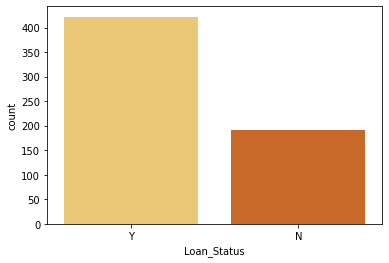

In [ ]:
sns.countplot(x='Loan_Status', data= loan_dataset, palette='YlOrBr')
plt.show()

In [70]:
count_Y = len(loan_dataset[loan_dataset.Loan_Status== 'Y'])
count_N = len(loan_dataset[loan_dataset.Loan_Status== 'N'])
count_Null = len(loan_dataset[loan_dataset.Loan_Status.isnull()])
#   printing the observation 
print(f"Percentage of Approved for loans : {(count_Y / (len(loan_dataset.Loan_Status))*100 ):.2f}%")
print(f"Percentage of Resjected for loans : {(count_N / (len(loan_dataset.Loan_Status))*100 ):.2f}%")
print(f"Percentage of Missing values : {(count_Null / (len(loan_dataset.Loan_Status))*100 ):.2f}%")

Percentage of Approved for loans : 68.73%
Percentage of Resjected for loans : 31.27%
Percentage of Missing values : 0.00%


The number of approved loans is higher compared to rejected loans .

9. Loan Amount Term

In [72]:
loan_dataset.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

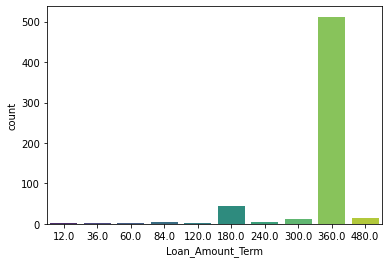

In [74]:
sns.countplot(x="Loan_Amount_Term", data=loan_dataset, palette="viridis")
plt.show()

In [76]:
count_12 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 12.0])
count_36 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 36.0])
count_60 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 60.0])
count_84 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 84.0])
count_120 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 120.0])
count_180 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 180.0])
count_240 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 240.0])
count_300 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 300.0])
count_360 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 360.0])
count_480 = len(loan_dataset[loan_dataset.Loan_Amount_Term == 480.0])
count_Null = len(loan_dataset[loan_dataset.Loan_Amount_Term.isnull()])

print(f"Percentage of 12 Term for loans : {(count_12 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 36 Term for loans : {(count_36 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 60 Term for loans : {(count_60 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 84 Term for loans : {(count_84 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 120 Term for loans : {(count_120 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 180 Term for loans : {(count_180 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 240 Term for loans : {(count_240 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 300 Term for loans : {(count_300 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 360 Term for loans : {(count_360 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")
print(f"Percentage of 480 Term for loans : {(count_480 / (len(loan_dataset.Loan_Amount_Term))*100 ):.2f}%")

print(f"Percentage of Missing values : {(count_Null / (len(loan_dataset.Loan_Status))*100 ):.2f}%")

Percentage of 12 Term for loans : 0.16%
Percentage of 36 Term for loans : 0.33%
Percentage of 60 Term for loans : 0.33%
Percentage of 84 Term for loans : 0.65%
Percentage of 120 Term for loans : 0.49%
Percentage of 180 Term for loans : 7.17%
Percentage of 240 Term for loans : 0.65%
Percentage of 300 Term for loans : 2.12%
Percentage of 360 Term for loans : 83.39%
Percentage of 480 Term for loans : 2.44%
Percentage of Missing values : 2.28%


The 360 days loan duration Term is the most popular Loan Approved, compared to others.

**Numerical Variable**

1. Describe Numerical Variable

In [78]:
from scipy.stats.stats import describe
loan_dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'
]].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


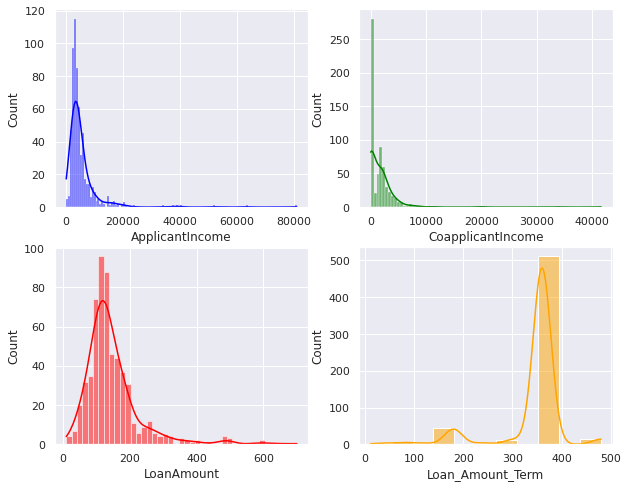

In [106]:
# Distribution of Numerical Variable
# distribution of numerical variable using histogram and violin plot.
sns.set(style='darkgrid')
figure, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_dataset, x="ApplicantIncome", kde=True,
             ax=axs[0, 0], color='blue')
sns.histplot(data=loan_dataset, x="CoapplicantIncome", kde=True,
             ax=axs[0, 1], color='green')
sns.histplot(data=loan_dataset, x="LoanAmount", kde=True,
             ax=axs[1, 0], color='red')
sns.histplot(data=loan_dataset, x="Loan_Amount_Term", kde=True,
               ax=axs[1, 1], color='orange');
plt.show()

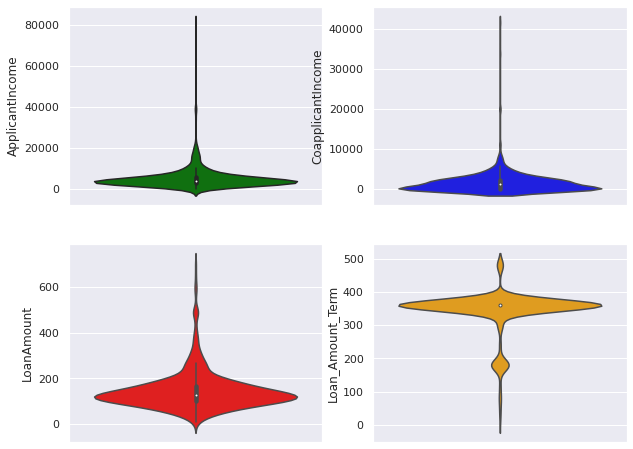

In [107]:
# distribution of numerical variable using Violin Plot
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 8))

sns.violinplot(data=loan_dataset, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=loan_dataset, y="CoapplicantIncome", ax=axs1[0, 1], color='blue')
sns.violinplot(data=loan_dataset, y="LoanAmount", ax=axs1[1, 0], color='red');
sns.violinplot(data=loan_dataset, y="Loan_Amount_Term", ax=axs1[1, 1], color='orange');

. The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).

The distribution of Loan Amount Term is negativly skewed and it has outliers.

**Other Exploration**

1. Heatmap

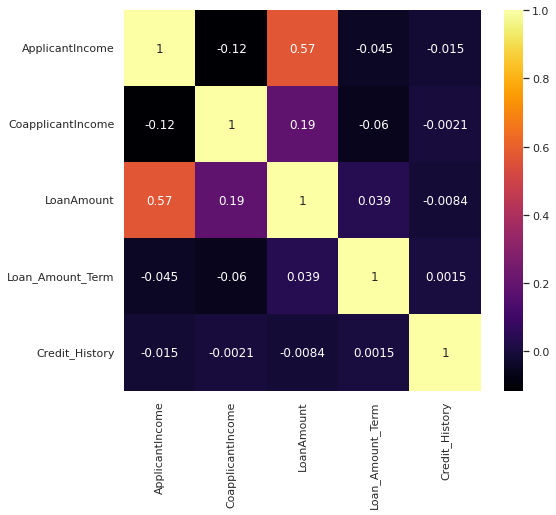

In [125]:
plt.figure(figsize=(8,7))
sns.heatmap(loan_dataset.corr(), annot=True, cmap='inferno')
plt.show()

There is positive correlation between Loan Amount and Applicant Income

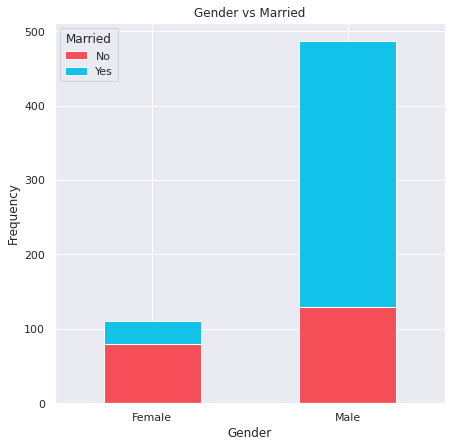

In [114]:
# Categorical variabl analysis visualization
pd.crosstab(loan_dataset.Gender, loan_dataset.Married).plot(
    kind="bar",
    stacked=True, figsize=(7,7), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

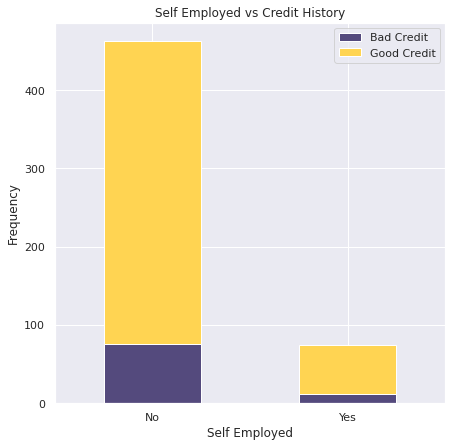

In [113]:
# Categorical variabl analysis visualization
pd.crosstab(loan_dataset.Self_Employed, loan_dataset.Credit_History).plot(
    kind="bar",
    stacked=True, figsize=(7,7), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

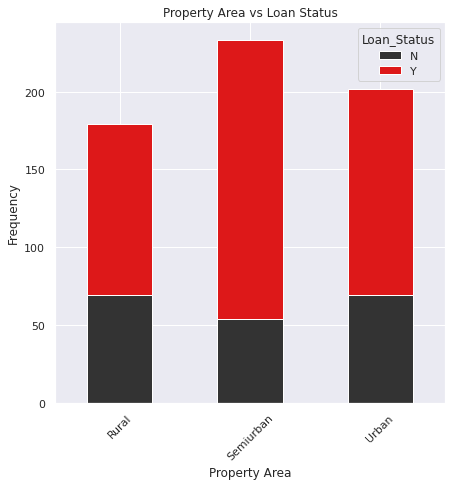

In [123]:
pd.crosstab(loan_dataset.Property_Area, loan_dataset.Loan_Status).plot(
    kind='bar', stacked=True, figsize=(7, 7), 
    color=['#333333','#dd1819'])

plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

** Categorical vs Numerical**

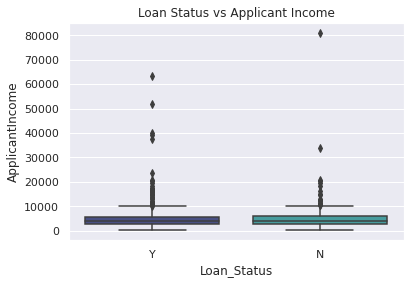

In [132]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_dataset,
            palette='mako')
plt.title('Loan Status vs Applicant Income')
plt.show()

There are lots of outliers in Applicant Income, and the distribution also positively skewed

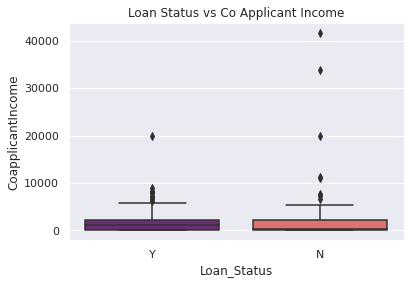

In [133]:
sns.boxplot(y="CoapplicantIncome", x="Loan_Status",
data=loan_dataset, palette='magma')
plt.title('Loan Status vs Co Applicant Income')
plt.show()

Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

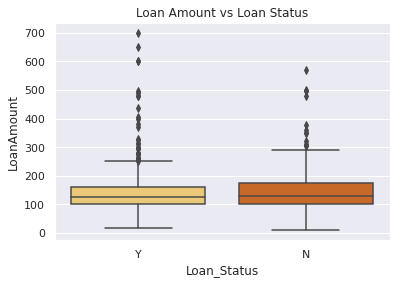

In [136]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=loan_dataset,
            palette="YlOrBr")
plt.title('Loan Amount vs Loan Status')
plt.show()

**Visualize Numerical vs Numerical**

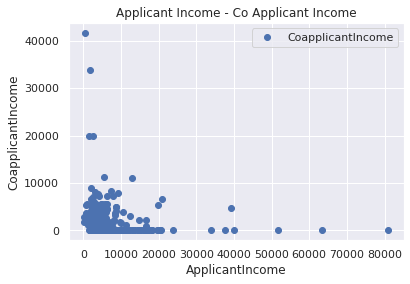

Pearson correlation: -0.11660458122889966
T test and P Value:
 Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)


In [144]:
loan_dataset.plot(x="ApplicantIncome", y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()

print('Pearson correlation:', loan_dataset['ApplicantIncome'].
      corr(loan_dataset['CoapplicantIncome']))

print('T test and P Value:\n', stats.ttest_ind(
    loan_dataset['ApplicantIncome'], loan_dataset['CoapplicantIncome']
))

There is negative correlation between Applicant income and Co Applicant Income.

The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

**Null Value**

In [145]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

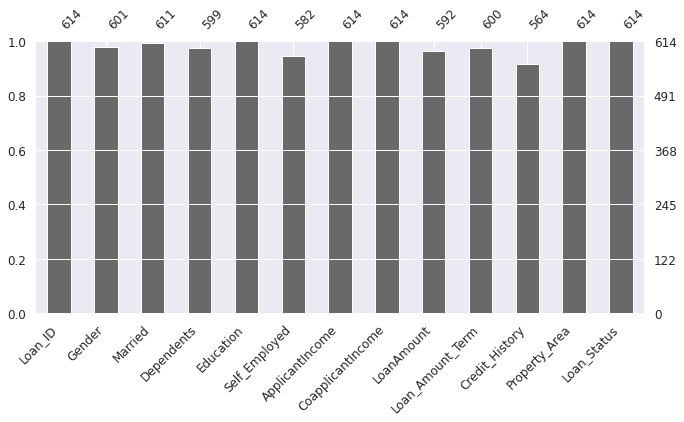

In [147]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1, 2 , 2)
mso.bar(loan_dataset, ax= axz, fontsize=12)
plt.show()

the null values has been explored for all variables in the dataset.

**Data Preprocessing**

In [149]:
# 1 Drop unecessary variables
loan_data1 = loan_dataset.drop('Loan_ID', axis= 1)

In [ ]:
# Data Imputation 
# is a technique for substituting an estimated value for missing
#  values in a dataset. In this section, the imputation will be 
# performed for variables that have missing values.


In [ ]:
# statistical measures 
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#  number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dopping the missing values 
loan_data = loan_dataset.copy()
loan_data = loan_data.dropna()

In [ ]:
# number of the missing values
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Label encoding
loan_data.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Dependent column value
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
#  replacing the value of 3+ to 4 because  3+ is not perfect for ML model
loan_data = loan_data.replace(to_replace='3+', value=4)

In [ ]:
# Dependents
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

**Data Visualization**

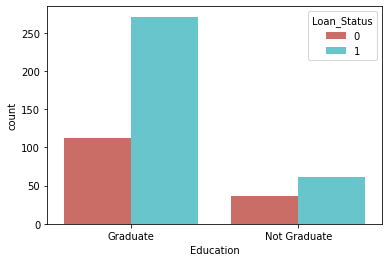

In [ ]:
# check the education and the loan status
sns.countplot(x='Education', hue='Loan_Status', data=loan_data, palette="hls")
plt.show()

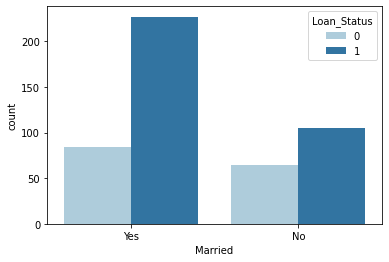

In [ ]:
# maritel status and teh loan
sns.countplot(x='Married',hue='Loan_Status',data=loan_data, palette="Paired")

In [ ]:
# convert categorical colums to numerical values 
loan_data.replace({'Married':{'No':0, 'Yes':1},
                   'Gender':{'Male':1, 'Female':0},
                   'Self_Employed':{'No':0, 'Yes':1},
                   'Property_Area':{'Rural':0, 'Semiurban':1, 
                                    'Urban':2},
                   'Education':{'Graduate':1, 'Not Graduate':0} 
                   }, inplace=True)


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# separating the data and label
X = loan_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_data['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Train Test Data Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,
                                                   stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


**Training the model**

Support vector Machine Model

In [ ]:
svm_classifier = SVC(kernel= 'linear')

In [ ]:
# training the support vector model
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [ ]:
# accuracy score on training data
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data:\n',training_data_accuracy)

Accuracy on training data:
 0.7786458333333334


In [ ]:
# Accuracy score on test data
X_test_prediction = svm_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on testing data:\n',test_data_accuracy)

Accuracy on testing data:
 0.8125


In [ ]:
input_data= (1,1,0,1,0,3033,1459.0,94.0,360.0,1.0,2)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svm_classifier.predict(input_data_reshaped)
print(prediction)


if (prediction[0]==1):
  print('Loan is approved')
  print(' we predicted on data:\n',input_data_reshaped.shape )
else:
  print('Loan is not approved')

[1]
Loan is approved
 we predicted on data:
 (1, 11)


**End SVM model**